In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

%matplotlib inline

In [42]:
data = pd.read_csv('Mushrooms.csv')

In [43]:
data.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [44]:
data.shape

(8123, 23)

In [45]:
data.isnull().sum()

p      0
x      0
s      0
n      0
t      0
p.1    0
f      0
c      0
n.1    0
k      0
e      0
e.1    0
s.1    0
s.2    0
w      0
w.1    0
p.2    0
w.2    0
o      0
p.3    0
k.1    0
s.3    0
u      0
dtype: int64

In [46]:
data.describe()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
count,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,...,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3655,3244,2283,4748,3528,7913,6811,5612,1728,...,4935,4463,4383,8123,7923,7487,3967,2388,4040,3148


In [70]:
data.columns

Index(['p', 'x', 's', 'n', 't', 'p.1', 'f', 'c', 'n.1', 'k', 'e', 'e.1', 's.1',
       's.2', 'w', 'w.1', 'p.2', 'w.2', 'o', 'p.3', 'k.1', 's.3', 'u'],
      dtype='object')

In [71]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [72]:
def plot_col(col, hue=None, color=['red', 'lightgreen'], labels=None):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.countplot(col, hue=hue, palette=color, saturation=0.6, data=data, dodge=True, ax=ax)
    ax.set(title = f"Mushroom {col.title()} Quantity", xlabel=f"{col.title()}", ylabel="Quantity")
    if labels!=None:
        ax.set_xticklabels(labels)
    if hue!=None:
        ax.legend(('Poisonous', 'Edible'), loc=0)

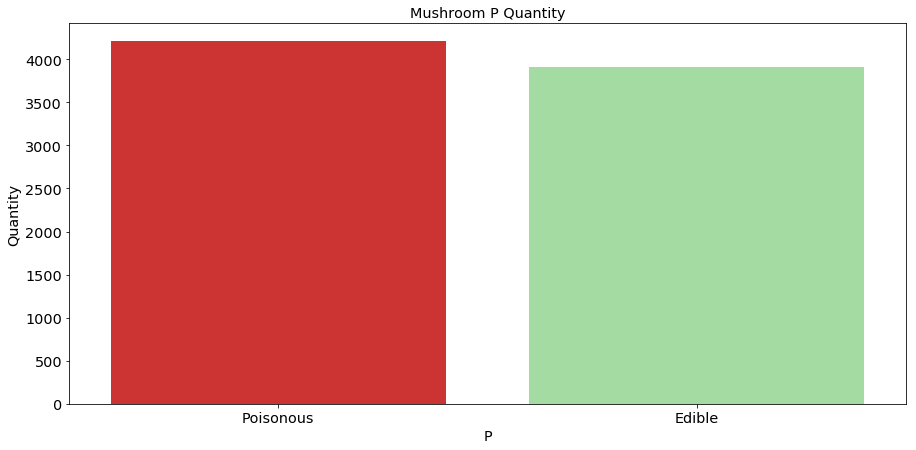

In [73]:
class_dict = ('Poisonous', 'Edible')
plot_col(col='p', labels=class_dict)

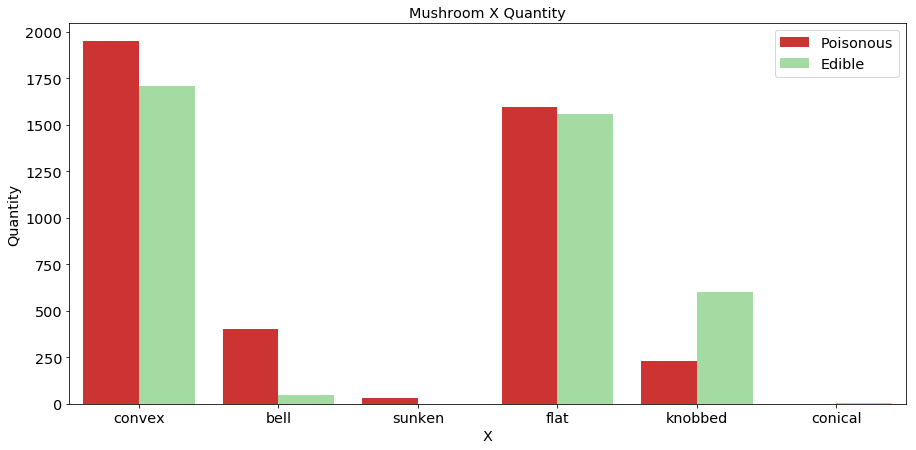

In [74]:
shape_dict = {"bell":"b","conical":"c","convex":"x","flat":"f", "knobbed":"k","sunken":"s"}
labels = ('convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical')
plot_col(col='x', hue='p', labels=labels)

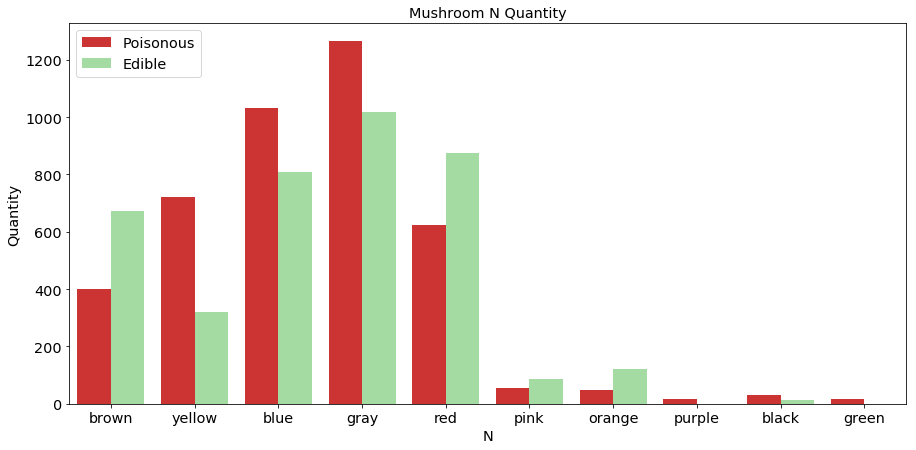

In [75]:
plot_col(col='n', hue='p', labels=color_dict)

## Plot pairwise relationships in a mushrooms for each stalk categorize.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


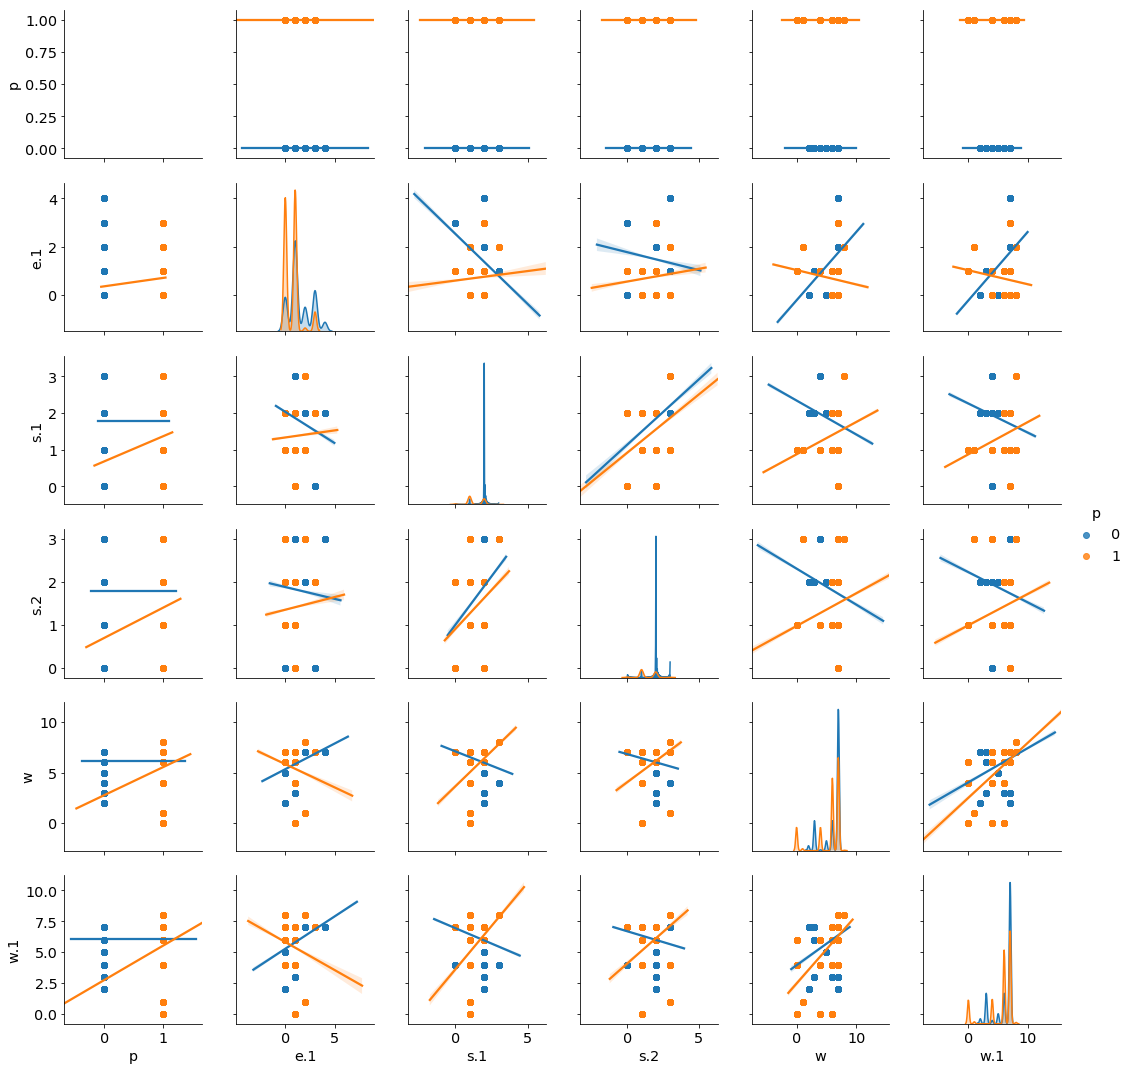

In [76]:
stalk_cats = ['p', 'e.1', 's.1', 's.2', 'w', 'w.1']
data_cats = data_encoded[stalk_cats]
sns.pairplot(data_cats, hue='p', kind='reg')

## Visualize the distribution in a mushrooms for each stalk categorize.

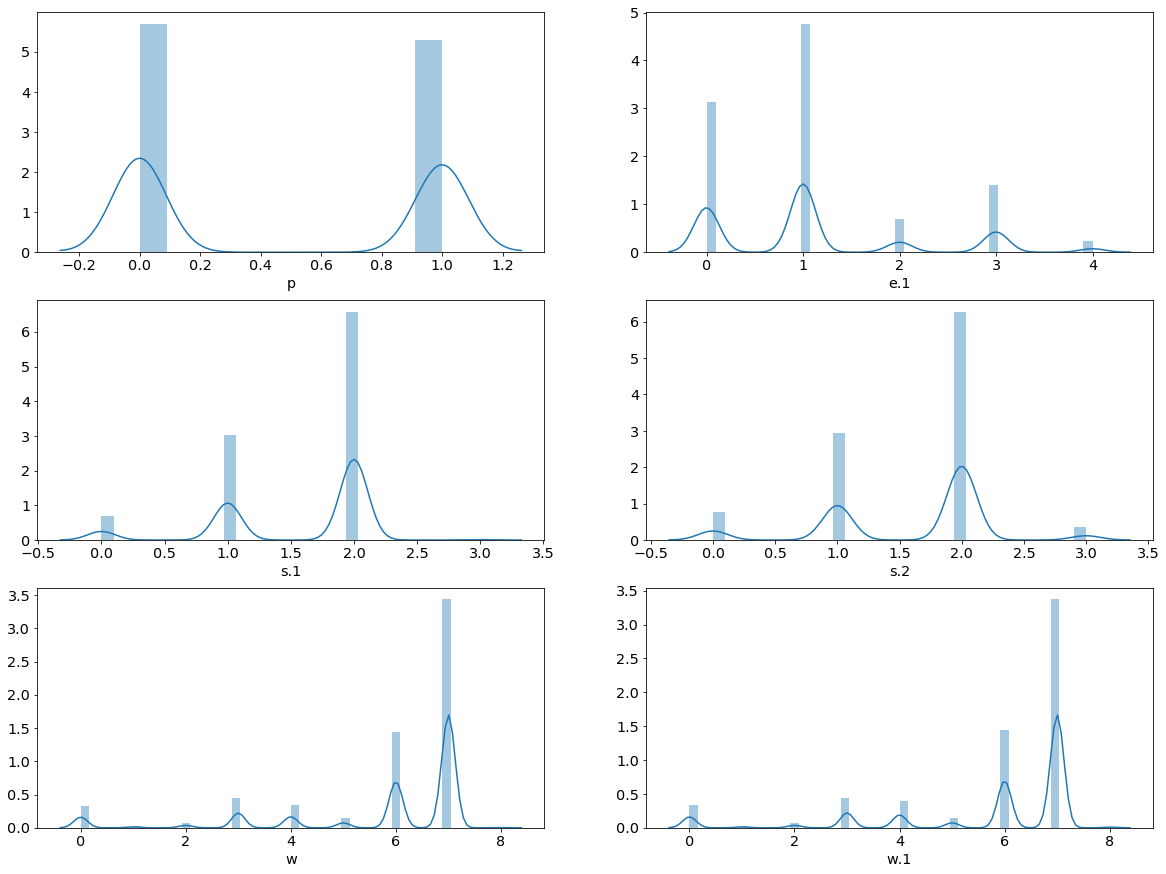

In [63]:
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
for i, axis in enumerate(ax.flat):
    sns.distplot(data_cats.iloc[:, i], ax=axis)

# Class column is response and rest columns are predictors. Seprating Predictors and Response

In [78]:
X=data.drop('p',axis=1) #Predictors
y=data['p'] #Response
X.head()


,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
1,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
2,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
3,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
4,x,y,y,t,a,f,c,b,n,e,...,s,w,w,p,w,o,p,k,n,g


# Label encoding

In [79]:
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [80]:
X.head()

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
1,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
2,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
3,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
4,5,3,9,1,0,1,0,0,5,0,...,2,7,7,0,2,1,4,2,2,1


In [81]:
y

array([0, 0, 1, ..., 0, 1, 0])

In [82]:
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,x_1,x_2,x_3,x_4,x_5,s_1,s_2,s_3,n_1,n_2,...,s.3_2,s.3_3,s.3_4,s.3_5,u_1,u_2,u_3,u_4,u_5,u_6
0,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [102]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  """


In [103]:
from sklearn.neural_network import MLPClassifier

In [104]:
clf = MLPClassifier(random_state=0, max_iter = 500).fit(X_train, y_train)

In [105]:
y_pred = clf.predict(x_test)

In [106]:
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [107]:
accuracy_score(y_test, y_pred)

0.9778416085350842

In [108]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1258,    8],
       [  46, 1125]], dtype=int64)

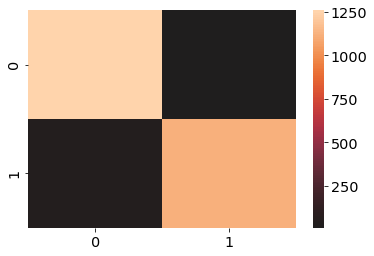

In [109]:
sns.heatmap(cm, center=True)
plt.show()